In [14]:
clear, clc;
addpath('../MALSAR/utils/')
addpath('../MALSAR/functions/Lasso/')


In [15]:
n = 50;
d = 300;
t = 10;

X = cell(t, 1);
Y = cell(t, 1);
W = randn(d, t);
W(1:5,:)

ans =

 Columns 1 through 7:

  -0.841986   0.289265  -1.027247   1.770149  -0.759418   0.134045   0.744963
   0.261755   1.137074   1.284170   0.132425  -0.776792   0.042626  -0.148933
   1.022588  -3.681875  -1.103125   2.437366  -0.340163  -1.948896   0.624941
  -0.862187  -0.727629  -0.473725   1.180617   0.420936   0.371480  -0.966895
   0.281163  -1.368911   0.679640   1.134795   0.298204  -2.357518   0.323976

 Columns 8 through 10:

   0.075990   0.035988  -0.506848
  -0.823095  -0.438279   0.173754
   0.476135  -0.039744  -1.529770
   0.285082  -0.044852   0.109658
  -0.278404  -0.459949   0.662361



In [16]:
W_mask = abs(randn(d, t))<1;
W_mask(1:5, :)

ans =

  0  1  0  1  0  0  1  1  1  1
  0  1  1  1  0  1  0  1  1  1
  1  0  1  0  1  1  1  1  1  1
  0  1  0  0  0  1  0  1  0  0
  0  0  1  1  0  1  1  1  1  1



In [19]:
W(W_mask) = 0;
for i = 1: t
    X{i} = randn(n, d);
    Y{i} = sign(X{i} * W(:, i) + rand(n, 1) * 1.91);
    #Y{i} = X{i} * W(:, i) + rand(n, 1) * 0.01;
end

In [20]:
% training and prediction using least squares loss
[W_pred funcVal] = Least_Lasso(X, Y, 0.01);
% compute training error
least_acc = zeros(t, 1);
for i = 1: t
    least_acc(i) = nnz(sign(X{i} * W_pred(:, i)) == Y{i})/n;
end
fprintf('Least Squares Loss Training Accuracy: %.4f +/- %.4f\n', mean(least_acc), std(least_acc));


Least Squares Loss Training Accuracy: 1.0000 +/- 0.0000


In [21]:
% training and prediction using logistic loss
[W_pred_logistics C_pred funcValLogistic]= Logistic_Lasso(X, Y, 0.01);
% compute training error
logistic_acc = zeros(t, 1);
for i = 1: t
    logistic_acc(i) = nnz(sign(X{i} * W_pred_logistics(:, i) + C_pred(i)) == Y{i})/n;
end
fprintf('Logistic Loss Training Accuracy: %.4f +/- %.4f\n', mean(logistic_acc), std(logistic_acc));


Logistic Loss Training Accuracy: 1.0000 +/- 0.0000


In [22]:
size(X{1}), size(W_pred_logistics), size(C_pred(1))
X{i} * W_pred_logistics(:, i) + C_pred(i)

ans =

    50   300

ans =

   300    10

ans =

   1   1

ans =

  -4.5812
  -3.0242
  -2.9787
   3.4719
   2.9688
  -5.2487
   2.5406
   2.9417
  -5.3070
  -5.9786
   3.8035
  -3.0382
   2.3342
  -4.7203
  -3.7195
  -4.0102
  -3.5218
   2.4716
  -3.4640
  -4.6181
  -2.9484
  -3.4085
   3.9688
   3.5494
  -3.1687
   3.8972
   3.8355
  -4.0940
   3.1782
  -2.7177
  -3.1179
   4.8688
  -2.6389
  -2.9850
  -2.6083
  -4.5326
   2.4699
   4.0846
  -4.2398
   5.0588
  -2.3315
   3.2124
   2.8924
  -3.4302
   2.8275
   3.0258
  -4.0081
   4.5965
  -3.9316
   2.6663



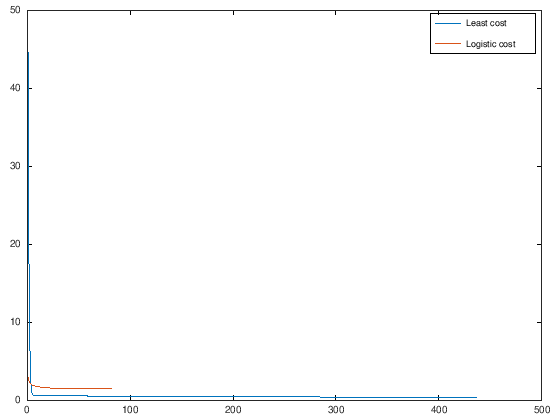

In [12]:
plot(funcVal, "displayname", "Least cost")
hold on 
plot(funcValLogistic, "displayname", "Logistic cost")
legend()

In [46]:
C_pred

C_pred =

 Columns 1 through 8:

   0.10640   0.36193   1.20099   0.31335  -0.21797  -0.88085  -0.68995   1.28954

 Columns 9 and 10:

   0.64137   0.12767



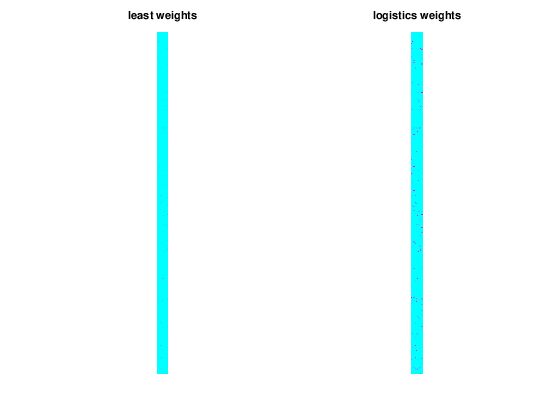

In [13]:
subplot (1, 2, 1);
imshow(W_pred ,"colormap", colormap('cool'));
title('least weights')
subplot (1, 2, 2);
imshow(W_pred_logistics ,"colormap", colormap('cool'));
title('logistics weights')